# Сборный проект

 Цель: Выявление закономерностей, которые определяют успешность игры.

Описание: Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Выявление закономерностей включает этапы 

###  Oбзор данных

### Предобработка данных

### Исследовательский анализ данных

• Анализ количества выпущенных игр за разные годы.

• Динамика продаж по платформам.

• Определение актуального периода для построения прогноза на 2017 год.

• Изучение платформ - лидеров по продажам, их потенциальной прибыльности.

• Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

### Портрет пользователя каждого региона

• Самые популярные платформы (топ-5).

• Самые популярные жанры (топ-5). 

• Влияние рейтинга ESRB на продажи в отдельном регионе.

### Проверка гипотез:

• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

• Средние пользовательские рейтинги жанров Action и Sports разные.

## Обзор данных

Импорт библиотек

Изучение общей информации

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [330]:
data = pd.read_csv('/datasets/games.csv')

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [332]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

Изменить названия столбцов - привести к нижнему регистру

In [333]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразование данных в нужные типы

In [334]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [335]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

In [336]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan


In [337]:
data['user_score'] = data['user_score'].astype('float64')


In [338]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Около 14,5% строк с аббревиатурой tbd (to be decided - подлежит уточнению). Чтобы не нарушить оценку рейтингов произведена замена пропусков на значение NaN. Года релиза приведем к целочисленному формату, а оценку пользователей с типа object на float - вещественное число.

Обработка пропусков данных

In [339]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [340]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Незначительное количество пропусков - 2, их можно удалить.

In [341]:
data.drop(index = [659, 14244], inplace = True)
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В столбце 'year_of_release' всего 269 пропусков - всего 1,61% всех строк, можно удалить.

In [342]:
data.dropna(subset=['year_of_release'], inplace = True)

In [343]:
rating = pd.read_csv('/datasets/rating.csv')
rating.head()

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)


In [344]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [345]:
data.loc[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [346]:
data['rating'] = data['rating'].fillna('no_rating')

In [347]:
data = data.query('rating!="EC"')
data = data.query('rating!="RP"')
data = data.query('rating!="AO"')
data = data.query('rating!="K-A"')

Пропуски заполнили значением 'no_rating'. А категории EC, RP, AO, K-A удалить, так как данных по ним незначительное количество.

In [348]:
data['rating'].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
Name: rating, dtype: int64

In [349]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8451
user_score         8974
rating                0
dtype: int64

In [350]:
data.duplicated().sum()

0

Дубликаты не обнаружены. Пропуски (где возможно) заполнены.

In [351]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


РАЗДЕЛ 2

Вывод: 

1) преобразованы данные в столбцах year_of_release и user_score

2) пропуски заполнены/удалены в столбцах rating, year_of_release, name

3) посчитаны суммарные продажи во всех регионах и запишите их в отдельный столбец.

## Исследовательский анализ данных

Сколько игр выпускалось в разные годы?

До 2000х выпускалось небольшое количество игр. Возможно это связано с "новым витком" в сфере игр (графика, оборудование и тп.), что вовлекло большее количество пользователей. Вырос спрос и соответственно предложение.

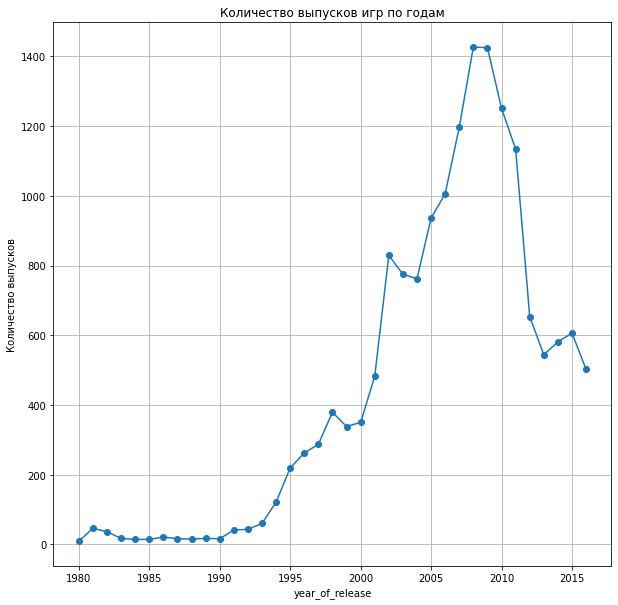

In [352]:
plt.figure(figsize=(10,10))
plt.title('Количество выпусков игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпусков')
data[data['year_of_release'] > 0].groupby('year_of_release')['platform'].agg('count').plot(grid=True, style='o-')
plt.show()

С 2013 начался спад выпуска компьютерных игр. Вероятно это связано с перенасыщением рынка и ростом спроса на мобильные игры в связи с развитием данной сферы.

Значительный рост выпусков наблюдается с 1995 года.

Как менялись продажи по платформам?

In [353]:
platform = data.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending = False).reset_index()
platform

,platform,count,sum
0,PS2,2126,1233.32
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1284,890.52
4,DS,2119,802.13
5,PS,1189,725.67
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


Выбрать несколько топовых платформ (топ 6).

In [354]:
platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(7)
platform

,platform,total_sales
0,PS2,1233.32
1,X360,961.24
2,PS3,931.34
3,Wii,890.52
4,DS,802.13
5,PS,725.67
6,PS4,314.14


In [355]:
top_platform = platform['platform'].to_list()
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

Создать датасет топовых платформ

In [356]:
data_top_platform = data.query('platform in @top_platform')
data_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


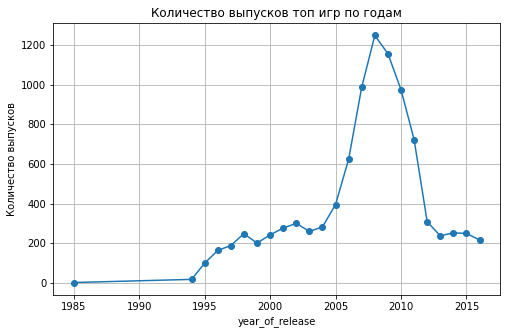

In [357]:
plt.figure(figsize=(8,5))
plt.title('Количество выпусков топ игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпусков')
data_top_platform[data_top_platform['year_of_release'] > 0].groupby('year_of_release')['platform'].agg('count').plot(grid=True, style='o-')
plt.show()

Заметный рост количества выпусков наблюдается с 1995 года.

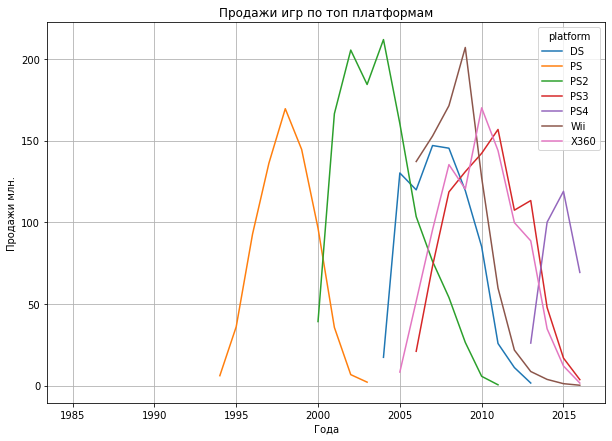

In [358]:
pd.pivot_table(data_top_platform , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,7))
plt.grid(True)
plt.title('Продажи игр по топ платформам')
plt.xlabel('Года')
plt.ylabel('Продажи млн.')
plt.show()


За какой характерный срок появляются новые и исчезают старые платформы

In [359]:
data_top_platform_year = data_top_platform.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
data_top_platform_year['platform'].value_counts()

PS2     12
X360    12
Wii     11
DS      11
PS3     11
PS      10
PS4      4
Name: platform, dtype: int64

 Таким образом, в среднем за 11 лет появляются новые и исчезают старые топовые платформы. Актуальным периодом считать данные 2013-2016 гг. с учетом недавнего появления топовых платформ и актуальностью других. Тем более за данный период налюдается спад, что является наиболее актуальным моментом

Актуальный период

In [360]:
data_act_years = data[data['year_of_release'] >= 2013]
data_act_years.pivot_table(index='platform', columns='year_of_release', values='name', 
                           aggfunc='count', fill_value='.')

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,91.0,80.0,86.0,46.0
DS,8.0,.,.,.
PC,38.0,47.0,50.0,54.0
PS3,126.0,108.0,73.0,38.0
PS4,16.0,75.0,137.0,164.0
PSP,54.0,10.0,3.0,.
PSV,63.0,100.0,110.0,85.0
Wii,12.0,6.0,4.0,1.0
WiiU,42.0,31.0,28.0,14.0


Какие платформы лидируют по продажам, растут или падают? 

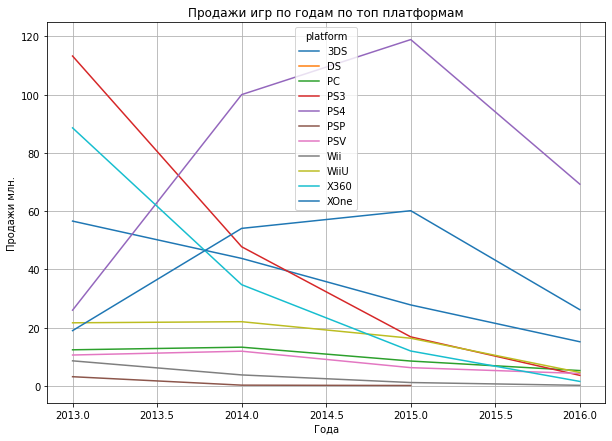

In [361]:
pd.pivot_table(data_act_years , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,7))
plt.grid(True)
plt.title('Продажи игр по годам по топ платформам')
plt.xlabel('Года')
plt.ylabel('Продажи млн.')
plt.show()

Таким образом, наиболее прибыльными платформами к 2016 году являются PS4, XOne, 3DS, WiiU, PC. Однако происходит спад продаж.

Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

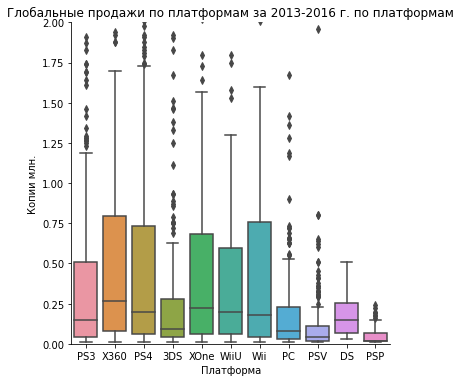

In [362]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=data_act_years, 
            orient='v',
            height=5)
plt.title('Глобальные продажи по платформам за 2013-2016 г. по платформам')
plt.xlabel('Платформа')
plt.ylabel('Копии млн.')
plt.ylim(0, 2)

Самое большое значение и длинный хвост -у Х360, PS4, Wii, XOne, WiiU, PS3 -1,2 - 1,75 млн. копий.

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 

Самой продаваемой платормой является PS4. Проведем ее анализ.

In [363]:
top_PS4 = data_act_years.query('platform == "PS4"')
top_PS4 = top_PS4[['critic_score', 'user_score', 'total_sales']]
top_PS4.head()

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


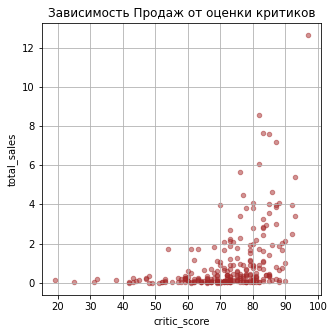

In [364]:
top_PS4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='brown', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков');

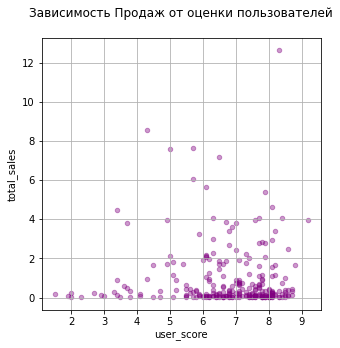

In [365]:
top_PS4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='purple', alpha=0.4, grid=True)
plt.title('Зависимость Продаж от оценки пользователей\n  ');

Оценки критиков и пользователей не оказывают сильного влияние на продажи игр.

In [366]:
data_act_years.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,0.039318,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,-0.020010,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,-0.027040,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.194025,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,-0.011500,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.502221,0.313700
user_score,0.039318,-0.020010,-0.027040,0.194025,-0.011500,0.502221,1.000000,-0.002608
total_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,-0.002608,1.000000


In [367]:
data_act_years['total_sales'].corr(data_act_years['critic_score'])

0.3136995151027371

Корреляция 0,3 свидетельствует об очень слабой связи между продажами и отзывами критиков.

In [368]:
data_act_years['total_sales'].corr(data_act_years['user_score'])

-0.0026078133545982744

Отсутствует связь между продажами и отзывами пользователей.

РАЗДЕЛ 3

Вывод:

1) средняя продолжительность жизни платформы составляет 11 лет

2) самые перспективные платформы: PS4, XOne, 3DS, WiiU, PC

3) за последние 3 года наблюдается спад в продажах топовых платформ

4) оценки критиков и пользователей не влияют на объемы продаж


## Портрет пользователя каждого региона

•	Самые популярные платформы (топ-5)

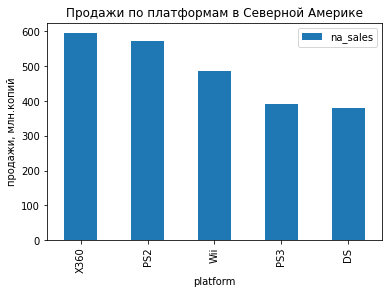

In [379]:
data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Продажи по платформам в Cеверной Америке');

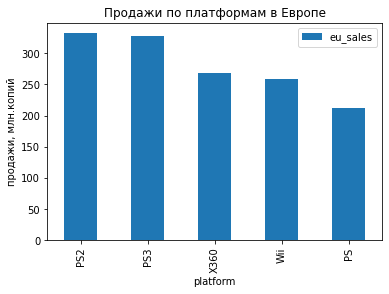

In [380]:
data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Продажи по платформам в Европе');

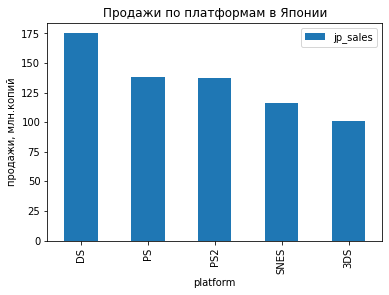

In [381]:
data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Продажи по платформам в Японии');

В Северной Америке наиболее восстребованы X360 и PS2, в Европе - PS2 и PS3, в Японии значительный отрыв наблюдается у DS.

•	Самые популярные жанры (топ-5)

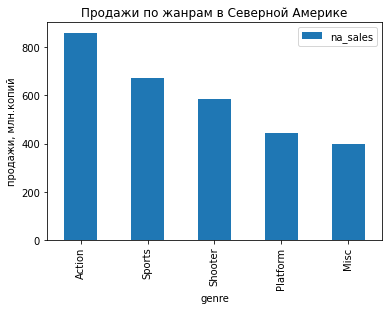

In [382]:
data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Продажи по жанрам в Северной Америке');

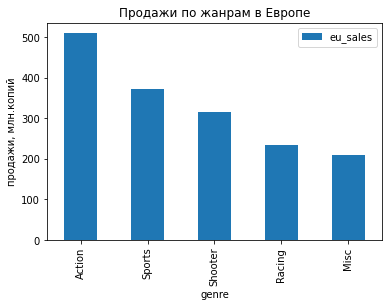

In [383]:
data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Продажи по жанрам в Европе');

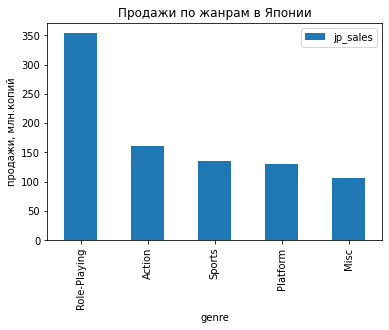

In [384]:
data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Продажи по жанрам в Японии');

В Северной Америке и Европе наиболее восстребованы экшен жанры, в Японии значительный отрыв наблюдается у ролевых игр.

•   Влияет ли рейтинг ESRB на продажи в отдельном регионе?

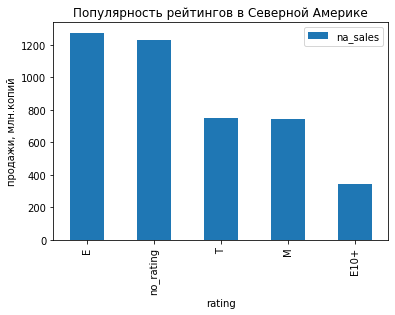

In [385]:
data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Популярность рейтингов в Северной Америке');

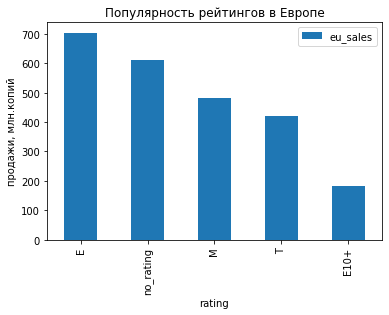

In [386]:
data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Популярность рейтингов в Европе');

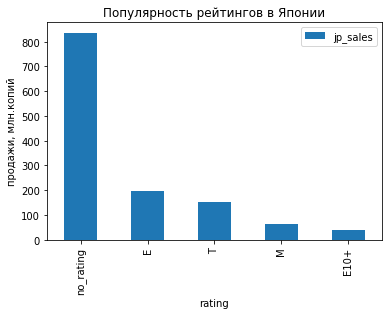

In [387]:
data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar').set(ylabel='продажи, млн.копий')
plt.title('Популярность рейтингов в Японии');

В Северной Америке и Европе наиболее восстребованы игры с рейтингом "Для всех", в Японии значительный отрыв наблюдается у игр с неопределенным рейтингом, также востребован рейтинг 'Для всех'.

РАЗДЕЛ 4

Вывод:
    
1) В Европе и Северной Америке схожий портрет пользователя.

Топ платформа: PS2 

Жанр игр: экшен

Рейтинг: для всех

2) В Японии

Топ платформа: DS 

Жанр игр: ролевые

Рейтинг: для всех

## Проверка гипотез

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0: средние пользовательские рейтинги платформ Xbox One и PC равны

Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [388]:
alpha = 0.05

In [389]:
xbox_one = data.query('platform == "XOne"')['user_score']
pc = data.query('platform == "PC"')['user_score']

In [390]:
results = st.ttest_ind(xbox_one, pc,equal_var = False, nan_policy='omit')

In [391]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.2790724212074636e-06
Отвергаем нулевую гипотезу


Р-значение говорит о том, что пользовательские рейтинги платформ Xbox One и PC сильно отличаются.

•	Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports (спортивные соревнования) разные

Н0: средние пользовательские рейтинги жанров Action и Sport равны

Н1: средние пользовательские рейтинги жанров Action и Sport не равны

In [392]:
action = data.query('genre == "Action"')['user_score']
sports = data.query('genre == "Sports"')['user_score']

In [393]:
results = st.ttest_ind(action, sports,equal_var = False, nan_policy='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07607291840585198
Не получилось отвергнуть нулевую гипотезу


Р-значение говорит о том, что с большой долей вероятности значимых различий между пользовательскими рейтингами жанров нет.

Общий вывод

Цикл жизни платформы составляет в среднем 11 лет. 

Топ-5 платформ за исследуемое время : PS4, XOne, 3DS, WiiU, PC. 

Для прогноза наиболее перспективной платформы на 2017 год был выбран актуальный период исходя из среднего периода жизни платфорты в 3 года. Именно в этот период произошел спад выпусков топовых платформ на уровень 2000-2005 годов после пика в 2008-2009 годах. Возможно произошло пресыщение рынка и стали более востребованы мобильные игры. 
Перспективных новых платформ, которые показывали бы тенденцию к росту, нет, поэтому стоит сконцентрироваться на продвижении топовых платформ - PS4 , XOne и 3DS. 

При разработке новых игр или для обновления старых следует учесть:

1) В Европе и Северной Америке схожий портрет пользователя. Топовые платформы PS2, PS3, X360, восстребованный жанр игр - экшен и рейтинг 'для всех'. В Японии топовой платформой является DS, восстребованный жанр игр - ролевые и рейтинг 'для всех'.

2) Средние пользовательские рейтинги платформ Xbox One и PC отличаются. Средние пользовательские рейтинги жанров Action и Sports схожи.

3) Оценки критиков и пользователей не влияют на объемы продаж.